# (PISA_2012 Data Visualization)
## by (Mostafa Massoud)

### Understand The Data
**PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.**

**Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.**


## Investigation Overview

By inviestigating the effect of some variables to student's plausible value on Maths some had greater effect than others.

## Dataset Overview

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

***Befor we continue forward I think it's important to understand plausible values, as I won't invistigate plausible value individually. While noting that it's wrong to treat plausible values as scores for students, because it is a better population estimated values based on the scoring of students. But for the simplicity to my visualization I shall invistigate the data with the mean of the plausible values of mathematics, since my goal is not the statistical meaning of the data but visualization of the data.***

*More info about plausible values and about the data generally can be found in the following links:

[PISA-2012](https://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf) **You can see 'Analysis of data with plausible values' in chapter9 for more explanation about plausible values*

[Plausible Values](https://www.oecd-ilibrary.org/docserver/9789264056275-7-en.pdf?expires=1613635190&id=id&accname=guest&checksum=28A261A3232AB1FE8D31D82514CAA726)

<a id='contents'></a>
# Contents:
- [Preliminary Wrangling](#title_1)
- [Data Wrangling & Creating Analysis DataFrame](#title_3)
- [pvmath_mean Distribution](#title_4)
- [Parent's Education Level Vs PVMATH Value For Students](#title_5)
- [Late and Skipping Days VS PVMATH values](#title_6)
- [PVMATH Mean Value by Late and Skipping days](#title_7)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pisa2012/pisadict2012.csv
/kaggle/input/pisa2012/pisa2012.csv/pisa2012.csv


[Return to Contents](#contents)

<a id='title_1'></a>
# Preliminary Wrangling

**In this section I will read the data set and decide the features I want to include in my visualization**

In [2]:
%%time
#reading datasets and droping index column in the file
pisa = pd.read_csv('/kaggle/input/pisa2012/pisa2012.csv/pisa2012.csv',encoding='latin',low_memory=False).drop('Unnamed: 0',axis=1)
dict_pisa = pd.read_csv('/kaggle/input/pisa2012/pisadict2012.csv',encoding='latin',index_col=0).to_dict()['x']

CPU times: user 1min 49s, sys: 9.08 s, total: 1min 58s
Wall time: 2min 24s


[Return to Contents](#contents)

<a id='title_3'></a>
# Data Wrangling & Creating Analysis DataFrame

In [3]:
%%time
#Choosen columns
cat_cols = ['CNT','ST08Q01','ST09Q01','ST13Q01','ST17Q01','ST29Q04']
num_cols = ['MTSUP','INTMAT','ST69Q02','ST70Q02']
plausible_values = ['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH']

#Gathering columns of intrest in analysis dataframe to start our invistigation
analysis_df = pisa[cat_cols+num_cols].copy()
#creating plausible value mean column
analysis_df['PVMATH_mean'] = pisa[plausible_values].apply(lambda x:x.mean(),axis=1)

#Changing columns name to more understandable names
dict_cols = {'CNT':'country',
            'ST08Q01':'late',
            'ST09Q01':'skip_day',
            'ST13Q01':'mother_edu',
            'ST17Q01':'father_edu',
            'ST29Q04':'enjoy_math',
            'MTSUP':'teacher_sup',
            'INTMAT':'math_interest',
            'ST69Q02':'min_class_period',
            'ST70Q02':'no_class_period',
            'PVMATH_mean':'pvmath_mean',}

cat_cols = [dict_cols[x] for x in cat_cols]
temp = analysis_df.columns
analysis_df.columns = [dict_cols[x] for x in temp]

CPU times: user 29.4 s, sys: 687 ms, total: 30.1 s
Wall time: 29 s


In [4]:
%%time
#Removing rows that 3 or more null values
null = analysis_df.apply(lambda x:x.isnull().sum(), axis=1)
analysis_df = analysis_df[null<=2].copy()

#droping duplicates
analysis_df.drop_duplicates(inplace=True)

CPU times: user 1min 46s, sys: 3.91 s, total: 1min 50s
Wall time: 1min 43s


In [5]:
%%time
#Changing the values in education columns according to https://ec.europa.eu/eurostat/cache/metadata/Annexes/educ_uoe_h_esms_an2.htm
dict_values = {'<ISCED level 3A> ':'lvl 3A',
           '<ISCED level 3B, 3C> ':'lvl (3B,3C)',
           'She did not complete <ISCED level 1> ':'lvl 0',
           'He did not complete <ISCED level 1> ':'lvl 0',
           '<ISCED level 2> ':'lvl 2',
           '<ISCED level 1> ':'lvl 1',
            'Five or more times  ':'5 or more',
             'Three or four times  ':'3-4 Times',
             'One or two times  ':'1-2 Times',
             'None  ':'Never',
            np.nan:np.nan}

analysis_df.replace(dict_values,inplace=True)

CPU times: user 3.07 s, sys: 34.4 ms, total: 3.11 s
Wall time: 3.1 s


In [6]:
%%time
def higher_edu(row):
    '''pd.series --> str
    
    Returns the heighest education level for both parent
    '''
    if row['father_edu'] is np.nan or row['mother_edu'] is np.nan:
        return np.nan
    edu_order = {'lvl 0':1, 'lvl 1':1, 'lvl 2':2, 'lvl 3A':3,'lvl (3B,3C)':4}
    father_education = row['father_edu']
    mother_education = row['mother_edu']
    
    if mother_education == father_education:
        return mother_education
    elif edu_order[father_education] > edu_order[mother_education]:
        return father_education
    else:
        return mother_education
    
analysis_df['higher_edu'] = analysis_df.apply(lambda x : higher_edu(x),axis=1)

CPU times: user 13.1 s, sys: 63.1 ms, total: 13.1 s
Wall time: 13.1 s


In [7]:
%%time
#Ordering categorical types columns
ordinal_var_dict = {'late': ['5 or more', '3-4 Times', '1-2 Times','Never'],
                    'skip_day': ['5 or more', '3-4 Times', '1-2 Times', 'Never'],
                    'father_edu': ['lvl 0', 'lvl 1', 'lvl 2', 'lvl 3A','lvl (3B,3C)'],
                    'mother_edu': ['lvl 0', 'lvl 1', 'lvl 2', 'lvl 3A', 'lvl (3B,3C)'],
                    'higher_edu': ['lvl 0', 'lvl 1', 'lvl 2', 'lvl 3A', 'lvl (3B,3C)'],
                    'enjoy_math': ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    analysis_df[var] = analysis_df[var].astype(ordered_var)

CPU times: user 392 ms, sys: 459 µs, total: 393 ms
Wall time: 392 ms


In [8]:
print('Columns Choosen for Analysis')
print('-'*15)
for col in list(dict_cols.keys())[:-1]:
    print(dict_cols[col],'-',dict_pisa[col])
print('pvmath_mean - Plausible value mean from 5 plausible values columns')
print('higher_edu - Highest education for both mother and father')
print('-'*15)
print(f'Final DataFrame for analysis has {analysis_df.shape[0]:,.0f} rows')

Columns Choosen for Analysis
---------------
country - Country code 3-character
late - Truancy - Late for School
skip_day - Truancy - Skip whole school day
mother_edu - Mother<Highest Schooling>
father_edu - Father<Highest Schooling>
enjoy_math - Math Interest - Enjoy Maths
teacher_sup - Mathematics Teacher's Support
math_interest - Mathematics Interest
min_class_period - Min in <class period> - <Maths>
no_class_period - No of <class period> p/wk - <Maths>
pvmath_mean - Plausible value mean from 5 plausible values columns
higher_edu - Highest education for both mother and father
---------------
Final DataFrame for analysis has 415,643 rows


[Return to Contents](#contents)

<a id='title_4'></a>
# pvmath_mean Distribution

**pvmath_mean columns was created from taking the mean value for 5 plausible values for Maths, it take values form 54.8 to 903.1, The distiribution of pvmath_mean column is normal distribution with mean equal to 469.7**

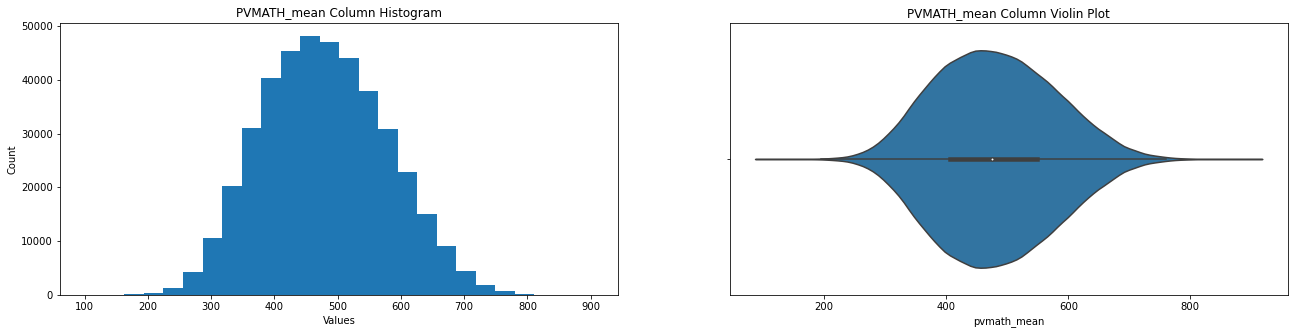

In [9]:
# PVMATH_mean column investigation
plt.figure(figsize=(22,5))
#Histogram Plot
plt.subplot(121)
bins = np.histogram_bin_edges(analysis_df['pvmath_mean'],bins='doane')
plt.hist(x='pvmath_mean', data= analysis_df,bins=bins)
#Customizing plot
plt.title('PVMATH_mean Column Histogram')
plt.ylabel('Count')
plt.xlabel('Values')
#Violin Plot
plt.subplot(122)
sns.violinplot(x='pvmath_mean', data=analysis_df);
plt.title('PVMATH_mean Column Violin Plot');

[Return to Contents](#contents)

<a id='title_5'></a>
# Parent's Education Level Vs PVMATH Value For Students

**It appears that the parent's education level may has an effect to the student's pvmath value as we can see that the lower the education level the lower the PVMATH mean value and when we look at the distribution of PVMATH values for each educational level we found that the distribution is slighltly right skewed words lower value in lower educational level**

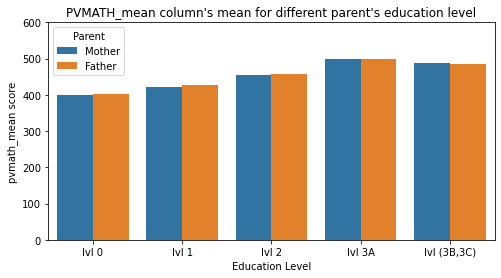

In [10]:
#Creating edu_df where there is no null values in columns of interest : [mother_edu,father_edu]
edu_df = analysis_df[~((analysis_df['father_edu'].isnull()) | (analysis_df['mother_edu'].isnull()))].copy()
#Getting pvmath mean values with each education level for both parents
m = pd.DataFrame(edu_df.groupby('mother_edu').mean()['pvmath_mean'])
f = pd.DataFrame(edu_df.groupby('father_edu').mean()['pvmath_mean'])
#Adding parent column for each dataframe
m['Parent'] = 'Mother'
f['Parent'] = 'Father'
#Mergening both dataframes 
parent_edu = pd.concat([m,f])

#Plotting bar chart for pvmath_mean mean values per each educational level
plt.figure(figsize=(8,4))
#barplot
sns.barplot(x=parent_edu.index,y='pvmath_mean',data=parent_edu,hue='Parent');
#customizing figure
plt.title('PVMATH_mean column\'s mean for different parent\'s education level')
plt.ylabel('pvmath_mean score');
plt.xlabel('Education Level');
plt.ylim(0,600);

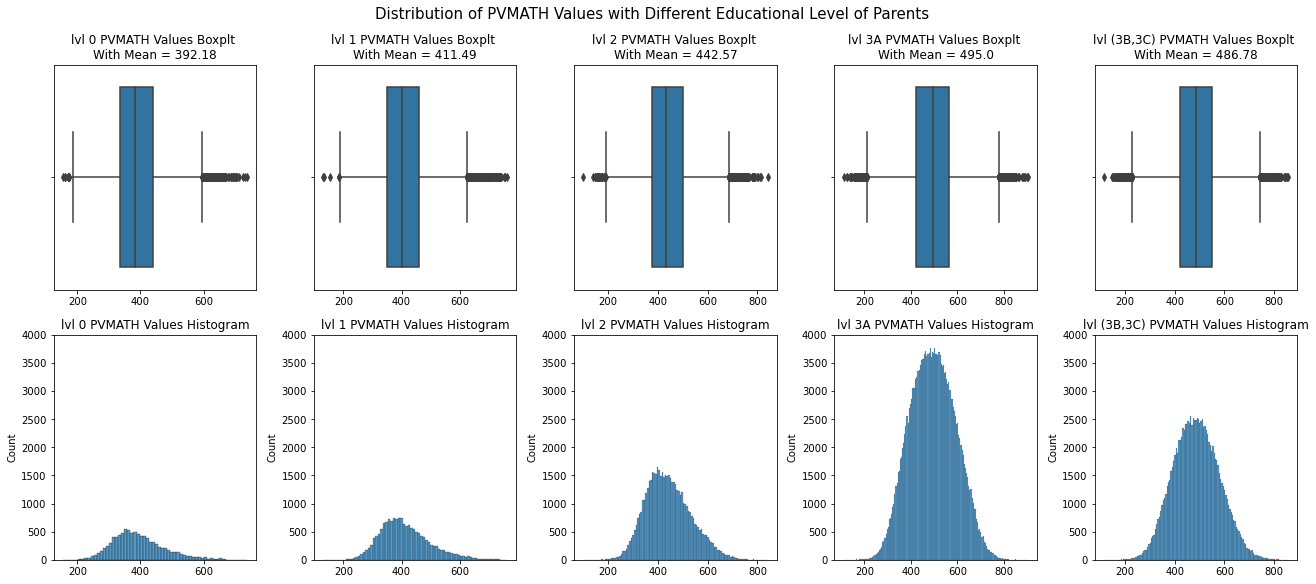

In [11]:
#plotting ditribution of pvmath_mean with education level
fig,axes = plt.subplots(2,5,figsize=(18,8),constrained_layout=True)
fig.suptitle(f'Distribution of PVMATH Values with Different Educational Level of Parents',size=15)
column_values = ['lvl 0', 'lvl 1', 'lvl 2', 'lvl 3A','lvl (3B,3C)']

for i in range(len(column_values)):
    #Getting plotting data and axes
    lvl = column_values[i]
    df = edu_df[edu_df['higher_edu']==lvl]
    ax1 = axes[0][i]
    ax2 = axes[1][i]
    #Boxplot
    sns.boxplot(x='pvmath_mean',data=df,ax=ax1)
    ax1.set_title(f'{lvl} PVMATH Values Boxplt \nWith Mean = {round(df["pvmath_mean"].mean(),2)}')
    ax1.set_xlabel('')
    #Histogram
    sns.histplot(x='pvmath_mean',data=df,ax=ax2)
    ax2.set_title(f'{lvl} PVMATH Values Histogram')
    ax2.set_ylim([0,4000])
    ax2.set_xlabel('')

[Return to Contents](#contents)

<a id='title_6'></a>
# Late and Skipping Days VS PVMATH values

**We can see that being late to school and skipping days may have an impact on pvmath value where the mean value is smaller for more time being late or more skipping days. with the line has greater slope for skipping days than being late**

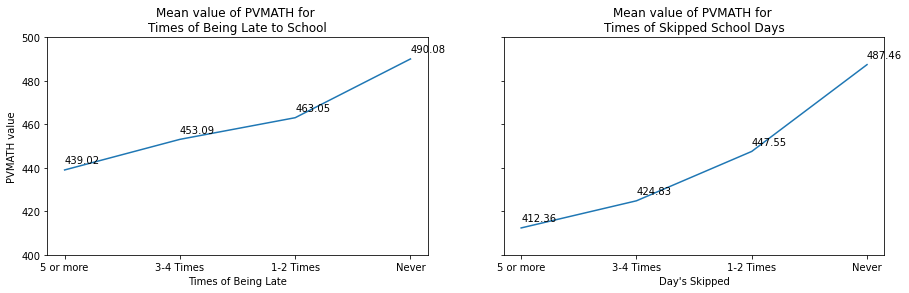

In [12]:
#Late and Skipping Days VS PVMATH values plotting
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4),sharey=True)
#Gathering data for late column
group = analysis_df.groupby('late').mean()['pvmath_mean']
#line plot
sns.lineplot(x=group.index,y=group,ax=ax1)
#axis customize
ax1.set_title('Mean value of PVMATH for \nTimes of Being Late to School')
ax1.set_ylabel('PVMATH value')
ax1.set_xlabel('Times of Being Late')
#annotation for each point
for i in range(len(group.index)):
    ax1.text(i,group[i]+3,'{:.2f}'.format(group[i]))
#Gathering data for skip_day plot
group = analysis_df.groupby('skip_day').mean()['pvmath_mean']
#line plot
sns.lineplot(x=group.index,y=group,ax=ax2)
#axis customize
ax2.set_title('Mean value of PVMATH for \nTimes of Skipped School Days')
ax2.set_xlabel('Day\'s Skipped')
#annotation for each point
for i in range(len(group.index)):
    ax2.text(i,group[i]+3,'{:.2f}'.format(group[i]))
plt.ylim(400,500);

[Return to Contents](#contents)

<a id='title_7'></a>
## PVMATH Mean Value by Late and Skipping days

**With taking the size for each interaction between late and skip_days columns into considiration, The PVMATH value for each interaction changes which may indecate an impact for both column in the PVMATH value of students.**

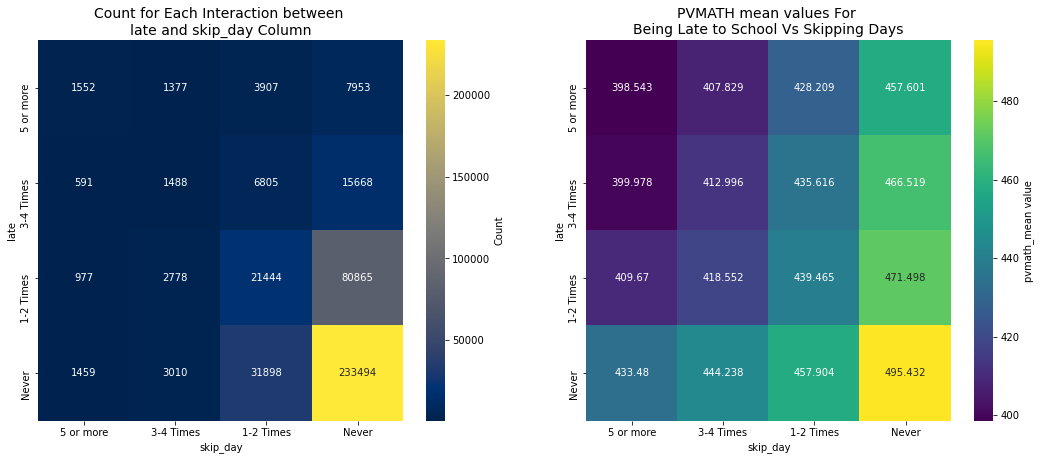

In [13]:
#Creating DataFrame with no Null values for late or skip_day columns
discipline_df = analysis_df[~((analysis_df['late'].isnull())|(analysis_df['skip_day'].isnull()))].copy()
#Gathering size data
discipline_size = analysis_df.groupby(['late','skip_day']).size()
discipline_size = discipline_size.reset_index(name='size')
discipline_size = discipline_size.pivot(index='late',columns='skip_day',values='size')
#Gathering PVMATH mean value data
discipline_mean = analysis_df.groupby(['late','skip_day'])['pvmath_mean'].mean()
discipline_mean = discipline_mean.reset_index(name='pvmath_mean')
discipline_mean = discipline_mean.pivot(index = 'late', columns = 'skip_day', values = 'pvmath_mean')

#Heatmap Plotting
plt.figure(figsize=(18,7))
#Size heatmap
plt.subplot(121)
sns.heatmap(discipline_size,annot=True,fmt='d',cbar_kws={'label':'Count'},cmap='cividis')
plt.title("Count for Each Interaction between \nlate and skip_day Column",size=14)
#PVMATH mean heatmap
plt.subplot(122)
sns.heatmap(discipline_mean,annot=True,fmt='g',cbar_kws={'label':'pvmath_mean value'},cmap='viridis')
plt.title("PVMATH mean values For \nBeing Late to School Vs Skipping Days",size=14)
plt.constrained_layout=True